# Stream Classification
---
notebooks adapted from the [streaming-data-analytics](https://github.com/emanueledellavalle/streaming-data-analytics) repo.

---

## `NEWeather` dataset

**Description:** The National Oceanic and Atmospheric Administration (NOAA),
has compiled a database of weather measurements from over 7,000 weather 
stations worldwide. Records date back to the mid-1900s. Daily measurements
include a variety of features (temperature, pressure, wind speed, etc.) as
well as a series of indicators for precipitation and other weather-related
events. The `NEweather` dataset contains data from this database, specifically
from the Offutt Air Force Base in Bellevue, Nebraska ranging for over 50 years
(1949-1999).

**Features:** 8 Daily weather measurements
 
|       Attribute      | Description |
|:--------------------:|:-----------------------------|
| `temp`                   | Temperature
| `dew_pnt`                | Dew Point
| `sea_lvl_press`          | Sea Level Pressure
| `visibility`             | Visibility
| `avg_wind_spd`           | Average Wind Speed
| `max_sustained_wind_spd` | Maximum Sustained Wind Speed
| `max_temp`               | Maximum Temperature
| `min_temp`               | Minimum Temperature


**Class:** `rain` | 0: no rain, 1: rain
 
**Samples:** 18,159


In [2]:
import pandas as pd
from river.stream import iter_pandas
from river.metrics import Accuracy,BalancedAccuracy,CohenKappa,GeometricMean
from river.metrics.base import Metrics
from river.evaluate import progressive_val_score

In [19]:
from river import metrics

y_true = [True, False, True, True, True]
y_pred = [True, True, False, True, True]

metric = metrics.Accuracy()
for yt, yp in zip(y_true, y_pred):
    metric = metric.update(yt, yp)

metric

Accuracy: 60.00%

In [22]:
metric.get()

0.6

In [3]:
data = pd.read_csv("../datasets/NEweather.csv")
features = data.columns[:-1]

In [4]:
import matplotlib.pyplot as plt
data["temp"]

0        19.8
1        26.8
2        34.6
3        26.4
4        14.7
         ... 
18154    32.6
18155    36.8
18156    41.9
18157    42.4
18158    36.6
Name: temp, Length: 18159, dtype: float64

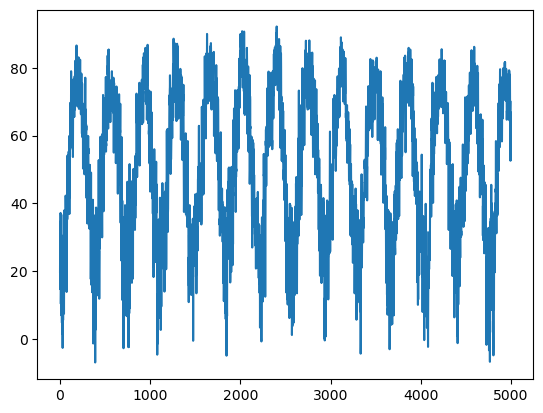

In [5]:
plt.plot(data["temp"][:5000])

In this example, we load the data from a csv file with `pandas.read_csv`, and we use the [iter_pandas](https://riverml.xyz/latest/api/stream/iter-pandas/) utility method to iterate over the `DataFrame`.

In [6]:
stream = iter_pandas(X=data[features], y=data['rain'])

In [8]:
for el in stream:
    print(el)
    break

({'temp': 19.8, 'dew_pnt': 14.0, 'sea_lvl_press': 1019.6, 'visibility': 8.4, 'avg_wind_spd': 9.9, 'max_sustained_wind_spd': 15.9, 'max_temp': 28.9, 'min_temp': 14.0}, 0)


## Naïve Bayes
---
[GaussianNB](https://riverml.xyz/latest/api/naive-bayes/GaussianNB/) maintains a Gaussian distribution $G_{cf}$ is maintained for each class $c$ and each feature $f$. Each Gaussian is updated using the amount associated with each feature; the details can be be found in proba.Gaussian. The joint log-likelihood is then obtained by summing the log probabilities of each feature associated with each class.

In [9]:
from river.naive_bayes import GaussianNB

model = GaussianNB()
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),GeometricMean(),CohenKappa()])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=1000)

[1,000] Accuracy: 71.17%, BalancedAccuracy: 71.80%, GeometricMean: 71.78%, CohenKappa: 39.94%
[2,000] Accuracy: 69.78%, BalancedAccuracy: 70.26%, GeometricMean: 70.25%, CohenKappa: 36.02%
[3,000] Accuracy: 68.99%, BalancedAccuracy: 69.60%, GeometricMean: 69.59%, CohenKappa: 34.19%
[4,000] Accuracy: 68.84%, BalancedAccuracy: 68.86%, GeometricMean: 68.86%, CohenKappa: 33.49%
[5,000] Accuracy: 69.11%, BalancedAccuracy: 67.97%, GeometricMean: 67.91%, CohenKappa: 32.71%
[6,000] Accuracy: 69.18%, BalancedAccuracy: 67.90%, GeometricMean: 67.82%, CohenKappa: 32.72%
[7,000] Accuracy: 69.20%, BalancedAccuracy: 67.91%, GeometricMean: 67.83%, CohenKappa: 32.67%
[8,000] Accuracy: 68.53%, BalancedAccuracy: 67.33%, GeometricMean: 67.26%, CohenKappa: 31.61%
[9,000] Accuracy: 68.67%, BalancedAccuracy: 66.69%, GeometricMean: 66.50%, CohenKappa: 30.99%
[10,000] Accuracy: 69.07%, BalancedAccuracy: 66.37%, GeometricMean: 66.02%, CohenKappa: 30.78%
[11,000] Accuracy: 69.56%, BalancedAccuracy: 66.54%, Geomet

Accuracy: 69.24%, BalancedAccuracy: 66.28%, GeometricMean: 65.81%, CohenKappa: 31.31%

## K-Nearest Neighbors
---
[KNN](https://riverml.xyz/latest/api/neighbors/KNNClassifier/) is a non-parametric classification method that keeps track of the last window_size training samples. The predicted class-label for a given query sample is obtained in two steps:

- Find the closest n_neighbors to the query sample in the data window. 
- Aggregate the class-labels of the n_neighbors to define the predicted class for the query sample.

In [10]:
from river.neighbors import KNNClassifier

model = KNNClassifier(n_neighbors=5, window_size=1000)
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),GeometricMean(),CohenKappa()])
stream = iter_pandas(X=data[features], y=data['rain'])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=1000)

[1,000] Accuracy: 76.28%, BalancedAccuracy: 70.85%, GeometricMean: 69.10%, CohenKappa: 43.59%
[2,000] Accuracy: 77.84%, BalancedAccuracy: 70.85%, GeometricMean: 68.68%, CohenKappa: 44.13%
[3,000] Accuracy: 78.56%, BalancedAccuracy: 70.38%, GeometricMean: 67.65%, CohenKappa: 43.86%
[4,000] Accuracy: 78.07%, BalancedAccuracy: 70.30%, GeometricMean: 67.70%, CohenKappa: 43.51%
[5,000] Accuracy: 77.76%, BalancedAccuracy: 70.23%, GeometricMean: 67.74%, CohenKappa: 43.18%
[6,000] Accuracy: 77.73%, BalancedAccuracy: 70.48%, GeometricMean: 68.15%, CohenKappa: 43.51%
[7,000] Accuracy: 77.91%, BalancedAccuracy: 70.82%, GeometricMean: 68.63%, CohenKappa: 44.02%
[8,000] Accuracy: 77.63%, BalancedAccuracy: 70.74%, GeometricMean: 68.62%, CohenKappa: 43.77%
[9,000] Accuracy: 77.72%, BalancedAccuracy: 70.88%, GeometricMean: 68.75%, CohenKappa: 44.12%
[10,000] Accuracy: 77.71%, BalancedAccuracy: 70.83%, GeometricMean: 68.71%, CohenKappa: 43.99%
[11,000] Accuracy: 77.84%, BalancedAccuracy: 70.96%, Geomet

Accuracy: 77.52%, BalancedAccuracy: 71.81%, GeometricMean: 70.15%, CohenKappa: 45.52%

In [11]:
from river.neighbors import KNNClassifier

model = KNNClassifier(n_neighbors=5, window_size=50)
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),GeometricMean(),CohenKappa()])
stream = iter_pandas(X=data[features], y=data['rain'])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=1000)

[1,000] Accuracy: 73.87%, BalancedAccuracy: 68.27%, GeometricMean: 66.34%, CohenKappa: 38.08%
[2,000] Accuracy: 75.79%, BalancedAccuracy: 68.29%, GeometricMean: 65.68%, CohenKappa: 38.81%
[3,000] Accuracy: 75.96%, BalancedAccuracy: 67.11%, GeometricMean: 63.75%, CohenKappa: 36.91%
[4,000] Accuracy: 75.82%, BalancedAccuracy: 67.70%, GeometricMean: 64.73%, CohenKappa: 37.85%
[5,000] Accuracy: 75.24%, BalancedAccuracy: 67.18%, GeometricMean: 64.17%, CohenKappa: 36.69%
[6,000] Accuracy: 74.91%, BalancedAccuracy: 67.02%, GeometricMean: 64.09%, CohenKappa: 36.22%
[7,000] Accuracy: 75.50%, BalancedAccuracy: 67.48%, GeometricMean: 64.54%, CohenKappa: 37.32%
[8,000] Accuracy: 75.08%, BalancedAccuracy: 67.21%, GeometricMean: 64.28%, CohenKappa: 36.70%
[9,000] Accuracy: 75.04%, BalancedAccuracy: 67.35%, GeometricMean: 64.50%, CohenKappa: 36.94%
[10,000] Accuracy: 75.22%, BalancedAccuracy: 67.48%, GeometricMean: 64.65%, CohenKappa: 37.23%
[11,000] Accuracy: 75.42%, BalancedAccuracy: 67.49%, Geomet

Accuracy: 74.62%, BalancedAccuracy: 67.92%, GeometricMean: 65.49%, CohenKappa: 37.81%

## Hoeffding Tree
---

[Hoeffding Tree](https://riverml.xyz/latest/api/tree/HoeffdingTreeClassifier/) 

Tree-based models are popular due to their interpretability. They use a tree data structure to model the data. When a sample arrives, it traverses the tree until it reaches a leaf node. Internal nodes define the path for a data sample based on the values of its features. Leaf nodes are models that provide predictions for unlabeled-samples and can update their internal state using the labels from labeled samples.

In [12]:
from river.tree import HoeffdingTreeClassifier

model = HoeffdingTreeClassifier()
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),GeometricMean(),CohenKappa()])
stream = iter_pandas(X=data[features], y=data['rain'])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=1000)

[1,000] Accuracy: 70.87%, BalancedAccuracy: 71.11%, GeometricMean: 71.10%, CohenKappa: 38.92%
[2,000] Accuracy: 69.73%, BalancedAccuracy: 68.12%, GeometricMean: 68.01%, CohenKappa: 33.45%
[3,000] Accuracy: 70.89%, BalancedAccuracy: 63.00%, GeometricMean: 60.16%, CohenKappa: 26.85%
[4,000] Accuracy: 71.29%, BalancedAccuracy: 61.85%, GeometricMean: 57.40%, CohenKappa: 25.57%
[5,000] Accuracy: 71.79%, BalancedAccuracy: 62.23%, GeometricMean: 57.58%, CohenKappa: 26.59%
[6,000] Accuracy: 72.13%, BalancedAccuracy: 62.56%, GeometricMean: 57.88%, CohenKappa: 27.40%
[7,000] Accuracy: 72.82%, BalancedAccuracy: 64.11%, GeometricMean: 60.42%, CohenKappa: 30.23%
[8,000] Accuracy: 72.58%, BalancedAccuracy: 64.31%, GeometricMean: 60.90%, CohenKappa: 30.45%
[9,000] Accuracy: 72.80%, BalancedAccuracy: 63.98%, GeometricMean: 59.98%, CohenKappa: 30.21%
[10,000] Accuracy: 72.85%, BalancedAccuracy: 63.64%, GeometricMean: 59.32%, CohenKappa: 29.69%
[11,000] Accuracy: 73.30%, BalancedAccuracy: 63.81%, Geomet

Accuracy: 73.55%, BalancedAccuracy: 65.87%, GeometricMean: 62.56%, CohenKappa: 34.07%

## Hoeffding Adaptive Tree
---
The [HAT](https://riverml.xyz/latest/api/tree/HoeffdingAdaptiveTreeClassifier/) model uses `ADWIN` to detect changes. If change is detected in a given branch, an alternate branch is created and eventually replaces the original branch if it shows better performance on new data.

In [13]:
from river.tree import HoeffdingAdaptiveTreeClassifier

model = HoeffdingAdaptiveTreeClassifier(seed=42)
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),GeometricMean(),CohenKappa()])
stream = iter_pandas(X=data[features], y=data['rain'])

progressive_val_score(dataset=stream, 
                      model=model, 
                      metric=metrics, 
                      print_every=1000)

[1,000] Accuracy: 70.67%, BalancedAccuracy: 70.72%, GeometricMean: 70.72%, CohenKappa: 38.32%
[2,000] Accuracy: 69.88%, BalancedAccuracy: 70.05%, GeometricMean: 70.05%, CohenKappa: 35.85%
[3,000] Accuracy: 69.72%, BalancedAccuracy: 67.38%, GeometricMean: 67.15%, CohenKappa: 32.06%
[4,000] Accuracy: 71.39%, BalancedAccuracy: 67.12%, GeometricMean: 66.31%, CohenKappa: 33.24%
[5,000] Accuracy: 71.97%, BalancedAccuracy: 66.39%, GeometricMean: 64.95%, CohenKappa: 32.83%
[6,000] Accuracy: 72.50%, BalancedAccuracy: 66.95%, GeometricMean: 65.52%, CohenKappa: 34.03%
[7,000] Accuracy: 73.17%, BalancedAccuracy: 67.60%, GeometricMean: 66.19%, CohenKappa: 35.37%
[8,000] Accuracy: 72.88%, BalancedAccuracy: 67.33%, GeometricMean: 65.88%, CohenKappa: 34.91%
[9,000] Accuracy: 72.94%, BalancedAccuracy: 66.52%, GeometricMean: 64.51%, CohenKappa: 33.97%
[10,000] Accuracy: 73.05%, BalancedAccuracy: 66.36%, GeometricMean: 64.21%, CohenKappa: 33.78%
[11,000] Accuracy: 73.63%, BalancedAccuracy: 66.66%, Geomet

Accuracy: 73.43%, BalancedAccuracy: 67.90%, GeometricMean: 66.25%, CohenKappa: 36.72%

## Concept Drift Impact

Concept drift can negatively impact learning methods if not properly handled. Multiple real-world applications suffer **model degradation** as the models can not adapt to changes in the data.

---
## `AGRAWAL` dataset

We will load the data from a csv file. The data was generated using the `AGRAWAL` data generator with 3 **gradual drifts** at the 5k, 10k, and 15k marks. It contains 9 features, 6 numeric and 3 categorical.

There are 10 functions for generating binary class labels from the features. These functions determine whether a **loan** should be approved.

| Feature    | Description            | Values                                                                |
|------------|------------------------|-----------------------------------------------------------------------|
| `salary`     | salary                 | uniformly distributed from 20k to 150k                                |
| `commission` | commission             | if (salary <   75k) then 0 else uniformly distributed from 10k to 75k |
| `age`        | age                    | uniformly distributed from 20 to 80                                   |
| `elevel`     | education level        | uniformly chosen from 0 to 4                                          |
| `car`        | car maker              | uniformly chosen from 1 to 20                                         |
| `zipcode`    | zip code of the town   | uniformly chosen from 0 to 8                                          |
| `hvalue`     | value of the house     | uniformly distributed from 50k x zipcode to 100k x zipcode            |
| `hyears`     | years house owned      | uniformly distributed from 1 to 30                                    |
| `loan`       | total loan amount      | uniformly distributed from 0 to 500k                                  |

**Class:** `y` | 0: no loan, 1: loan
 
**Samples:** 20,000

`elevel`, `car`, and `zipcode` are categorical features.

In [14]:
data = pd.read_csv("../datasets/agr_a_20k.csv")
features = data.columns[:-1]

In [15]:
data

,salary,commission,age,elevel,car,zipcode,hvalue,hyears,loan,class
0,110499.735409,0.000000,54,3,6,4,135000.0,30,354724.182530,1
1,140893.779095,0.000000,44,4,12,7,135000.0,2,395015.339020,1
2,119159.651677,0.000000,49,2,0,3,135000.0,22,122025.085242,1
3,20000.000000,52593.636537,56,0,19,1,135000.0,30,99629.621457,1
4,93956.320488,0.000000,59,1,6,1,135000.0,1,458679.826238,0
...,...,...,...,...,...,...,...,...,...,...
19995,112152.907316,0.000000,20,2,13,5,135000.0,13,180321.775202,1
19996,150000.000000,0.000000,39,3,5,3,135000.0,24,310994.278571,1
19997,86983.916858,0.000000,70,0,14,4,135000.0,13,88018.865692,1
19998,40050.075996,47604.107868,70,4,9,1,135000.0,25,331893.642348,1


## Naïve Bayes

In [16]:
from river.naive_bayes import GaussianNB

model = GaussianNB()
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),GeometricMean(),CohenKappa()])
stream = iter_pandas(X=data[features], y=data['class'])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=1000)

[1,000] Accuracy: 83.98%, BalancedAccuracy: 77.03%, GeometricMean: 74.15%, CohenKappa: 60.00%
[2,000] Accuracy: 86.29%, BalancedAccuracy: 80.38%, GeometricMean: 78.21%, CohenKappa: 66.57%
[3,000] Accuracy: 87.00%, BalancedAccuracy: 81.06%, GeometricMean: 79.01%, CohenKappa: 68.08%
[4,000] Accuracy: 87.55%, BalancedAccuracy: 81.46%, GeometricMean: 79.46%, CohenKappa: 69.09%
[5,000] Accuracy: 87.42%, BalancedAccuracy: 81.35%, GeometricMean: 79.32%, CohenKappa: 68.86%
[6,000] Accuracy: 80.50%, BalancedAccuracy: 75.06%, GeometricMean: 71.76%, CohenKappa: 54.67%
[7,000] Accuracy: 74.71%, BalancedAccuracy: 70.42%, GeometricMean: 66.14%, CohenKappa: 43.88%
[8,000] Accuracy: 70.87%, BalancedAccuracy: 67.68%, GeometricMean: 62.94%, CohenKappa: 37.38%
[9,000] Accuracy: 68.01%, BalancedAccuracy: 65.87%, GeometricMean: 60.95%, CohenKappa: 32.99%
[10,000] Accuracy: 66.25%, BalancedAccuracy: 64.90%, GeometricMean: 60.26%, CohenKappa: 30.56%
[11,000] Accuracy: 66.75%, BalancedAccuracy: 64.90%, Geomet

Accuracy: 65.94%, BalancedAccuracy: 64.90%, GeometricMean: 61.78%, CohenKappa: 30.38%

## Hoeffding Tree

In [17]:
from river.tree import HoeffdingTreeClassifier

model = HoeffdingTreeClassifier(nominal_attributes=['elevel', 'car', 'zipcode'])
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),GeometricMean(),CohenKappa()])
stream = iter_pandas(X=data[features], y=data['class'])

progressive_val_score(dataset=stream,
                      model=model,
                      metric=metrics,
                      print_every=1000)

[1,000] Accuracy: 81.68%, BalancedAccuracy: 74.40%, GeometricMean: 71.12%, CohenKappa: 54.21%
[2,000] Accuracy: 82.29%, BalancedAccuracy: 78.91%, GeometricMean: 78.19%, CohenKappa: 59.46%
[3,000] Accuracy: 83.49%, BalancedAccuracy: 82.29%, GeometricMean: 82.20%, CohenKappa: 63.59%
[4,000] Accuracy: 85.17%, BalancedAccuracy: 84.61%, GeometricMean: 84.60%, CohenKappa: 67.38%
[5,000] Accuracy: 86.20%, BalancedAccuracy: 86.08%, GeometricMean: 86.08%, CohenKappa: 69.88%
[6,000] Accuracy: 80.13%, BalancedAccuracy: 79.01%, GeometricMean: 78.88%, CohenKappa: 57.82%
[7,000] Accuracy: 76.30%, BalancedAccuracy: 75.31%, GeometricMean: 75.10%, CohenKappa: 50.84%
[8,000] Accuracy: 74.11%, BalancedAccuracy: 73.44%, GeometricMean: 73.26%, CohenKappa: 47.11%
[9,000] Accuracy: 73.64%, BalancedAccuracy: 73.16%, GeometricMean: 72.94%, CohenKappa: 46.59%
[10,000] Accuracy: 73.95%, BalancedAccuracy: 73.64%, GeometricMean: 73.43%, CohenKappa: 47.49%
[11,000] Accuracy: 73.20%, BalancedAccuracy: 72.85%, Geomet

Accuracy: 71.70%, BalancedAccuracy: 71.71%, GeometricMean: 71.71%, CohenKappa: 43.35%

## Hoeffding Adaptive Tree

In [18]:
from river.tree import HoeffdingAdaptiveTreeClassifier

model = HoeffdingAdaptiveTreeClassifier(nominal_attributes=['elevel', 'car', 'zipcode'], seed=42)
metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),GeometricMean(),CohenKappa()])
stream = iter_pandas(X=data[features], y=data['class'])

progressive_val_score(dataset=stream, 
                      model=model, 
                      metric=metrics, 
                      print_every=1000)

[1,000] Accuracy: 82.58%, BalancedAccuracy: 76.35%, GeometricMean: 74.03%, CohenKappa: 57.35%
[2,000] Accuracy: 86.84%, BalancedAccuracy: 84.59%, GeometricMean: 84.30%, CohenKappa: 70.26%
[3,000] Accuracy: 88.36%, BalancedAccuracy: 87.35%, GeometricMean: 87.29%, CohenKappa: 74.13%
[4,000] Accuracy: 89.80%, BalancedAccuracy: 89.28%, GeometricMean: 89.26%, CohenKappa: 77.31%
[5,000] Accuracy: 90.30%, BalancedAccuracy: 90.15%, GeometricMean: 90.15%, CohenKappa: 78.60%
[6,000] Accuracy: 83.51%, BalancedAccuracy: 82.16%, GeometricMean: 81.97%, CohenKappa: 64.68%
[7,000] Accuracy: 79.11%, BalancedAccuracy: 77.89%, GeometricMean: 77.58%, CohenKappa: 56.39%
[8,000] Accuracy: 77.58%, BalancedAccuracy: 76.54%, GeometricMean: 76.11%, CohenKappa: 53.81%
[9,000] Accuracy: 77.03%, BalancedAccuracy: 76.29%, GeometricMean: 75.79%, CohenKappa: 53.18%
[10,000] Accuracy: 77.59%, BalancedAccuracy: 77.16%, GeometricMean: 76.79%, CohenKappa: 54.71%
[11,000] Accuracy: 77.35%, BalancedAccuracy: 76.82%, Geomet

Accuracy: 79.80%, BalancedAccuracy: 79.53%, GeometricMean: 79.37%, CohenKappa: 59.32%

# Questions
- **Experimental Comparison**: compare the performance of adaptive and non-adaptive models on the Agrawal dataset.
- **Adapt an offline method**: train an offline method (anything from sklearn) using a drift detector (e.g. ADWIN). Whenever ADWIN finds a drift, retrain the model from scratch.
- **synthetic stream generators**: river provides many streams (`river.datasets`) and synthetic stream generators (`river.datasets.synth`). Evaluate a couple of models on a nonstationary stream. Then, try to use ADWIN to detect drifts and plot the DRIFT alarm and evaluate the alarm latency.
- **Ensembling**: try one of the ensemble methods from `river.ensemble`Is it adaptive to concept drift? Does it behave as you expected from the theory?